In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing

import zipfile
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.preprocessing import scale

In [2]:
dataset= pd.read_csv("chicago_crimes_data_2010_2017.csv", parse_dates = ['Date'])

## Feature Engineering

In [3]:
dataset.dropna(how='any') # Drop NA from the data sets
a = dataset.isnull().sum(axis = 1)
dataset = dataset[a==0]

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Build a data frame for the regression 
dataset_haha = pd.DataFrame() 
dataset_haha["category"] = dataset["Primary Type"]

dataset_haha["hour"] = dataset["Date"].map(lambda x: x.hour)
dataset_haha["day"] = dataset["Date"].map(lambda x: x.day)
dataset_haha["month"] = dataset["Date"].map(lambda x: x.month)
dataset_haha["year"] = pd.DataFrame(scale(dataset["Date"].map(lambda x: x.year)))
dataset_haha["dayofweek"] = dataset["Date"].map(lambda x: x.dayofweek)

In [5]:
days_off = USFederalHolidayCalendar().holidays(start='2010-01-01', end='2017-12-31').to_pydatetime()
dataset_haha["holiday"] = dataset["Date"].map(lambda x: datetime.datetime(x.year,x.month,x.day) in days_off)

In [6]:
dataset_haha["lon"] = pd.DataFrame(scale(dataset["Longitude"]))
dataset_haha["lat"] = pd.DataFrame(scale(dataset["Latitude"]))
dataset_haha["District"] = dataset["District"]
dataset_haha["Ward"] = dataset["Ward"]
dataset_haha["Community"] = dataset["Community Area"]

In [23]:
dataset_haha["Block"] = dataset["Block"].map(lambda x: x.split(" ")[-1].upper())
blocktype = dataset_haha.Block.value_counts().index
dataset_haha["Block"][~dataset_haha["Block"].isin(blocktype[0:8])] = 'ELSE'

dataset_haha["Location"] = dataset["Location Description"]
locationtype = dataset["Location Description"].value_counts().index
dataset_haha["Location"][~dataset_haha["Location"].isin(locationtype[0:14])] = 'OTHER'

dataset_haha['train_or_test'] = dataset['train_or_test']

In [8]:
dataset_haha.head(n=5)

,category,hour,day,month,year,dayofweek,holiday,lon,lat,District,Ward,Community,Block,Location,train_or_test
0,CRIMINAL DAMAGE,11,22,11,-0.510858,3,True,-1.881736,0.834478,25.0,36.0,18.0,AVE,PARKING LOT/GARAGE(NON.RESID.),train
1,WEAPONS VIOLATION,21,28,12,-0.946389,2,False,0.637693,-1.648437,5.0,34.0,53.0,ST,SIDEWALK,train
2,BATTERY,21,3,2,-1.381921,2,False,-0.281036,0.070941,10.0,28.0,30.0,ST,RESIDENCE,train
3,ROBBERY,13,21,6,-0.946389,1,False,0.089853,-1.523405,22.0,19.0,75.0,AVE,OTHER,train
4,ROBBERY,11,30,11,1.666799,3,False,-0.478139,0.925138,14.0,35.0,21.0,AVE,STREET,test


Change all the features to dummy variable

In [9]:
a = dataset_haha.isnull().sum(axis = 1)
dataset_haha = dataset_haha[a==0]

dayofweek_dm = pd.get_dummies(dataset_haha['dayofweek'], prefix='dayofweek')    
dataset_haha = pd.concat([dataset_haha,dayofweek_dm], axis=1)
dataset_haha.drop('dayofweek', axis=1, inplace=True)

holiday_dm = pd.get_dummies(dataset_haha['holiday'], prefix='holiday')    
dataset_haha = pd.concat([dataset_haha,holiday_dm], axis=1)
dataset_haha.drop('holiday', axis=1, inplace=True)


District_dm = pd.get_dummies(dataset_haha['District'], prefix='District')    
dataset_haha = pd.concat([dataset_haha,District_dm], axis=1)
dataset_haha.drop('District', axis=1, inplace=True)

Ward_dm = pd.get_dummies(dataset_haha['Ward'], prefix='Ward')    
dataset_haha = pd.concat([dataset_haha,Ward_dm], axis=1)
dataset_haha.drop('Ward', axis=1, inplace=True)

Community_dm = pd.get_dummies(dataset_haha['Community'], prefix='Community')    
dataset_haha = pd.concat([dataset_haha,Community_dm], axis=1)
dataset_haha.drop('Community', axis=1, inplace=True)


Block_dm = pd.get_dummies(dataset_haha['Block'], prefix='Block')    
dataset_haha = pd.concat([dataset_haha,Block_dm], axis=1)
dataset_haha.drop('Block', axis=1, inplace=True)

Location_dm = pd.get_dummies(dataset_haha['Location'], prefix='Location')    
dataset_haha = pd.concat([dataset_haha,Location_dm], axis=1)
dataset_haha.drop('Location', axis=1, inplace=True)

In [10]:
dataset_haha.head(n=5)

,category,hour,day,month,year,lon,lat,train_or_test,dayofweek_0,dayofweek_1,...,Location_RESIDENCE,Location_RESIDENCE PORCH/HALLWAY,Location_RESIDENCE-GARAGE,Location_RESIDENTIAL YARD (FRONT/BACK),Location_RESTAURANT,"Location_SCHOOL, PUBLIC, BUILDING",Location_SIDEWALK,Location_SMALL RETAIL STORE,Location_STREET,Location_VEHICLE NON-COMMERCIAL
0,CRIMINAL DAMAGE,11,22,11,-0.510858,-1.881736,0.834478,train,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WEAPONS VIOLATION,21,28,12,-0.946389,0.637693,-1.648437,train,0,0,...,0,0,0,0,0,0,1,0,0,0
2,BATTERY,21,3,2,-1.381921,-0.281036,0.070941,train,0,0,...,1,0,0,0,0,0,0,0,0,0
3,ROBBERY,13,21,6,-0.946389,0.089853,-1.523405,train,0,1,...,0,0,0,0,0,0,0,0,0,0
4,ROBBERY,11,30,11,1.666799,-0.478139,0.925138,test,0,0,...,0,0,0,0,0,0,0,0,1,0


Separate training data and test data for the future use

In [11]:
data_train = dataset_haha[dataset_haha['train_or_test'] == 'train']
data_test = dataset_haha[dataset_haha['train_or_test'] == 'test']

a = data_train.isnull().sum(axis = 1)
data_train = data_train[a==0]

a = data_test.isnull().sum(axis = 1)
data_test = data_test[a==0]

train_Y = data_train['category'] == 'THEFT'
train_X = data_train.iloc[:,1:]
train_X.drop('train_or_test', axis=1, inplace=True)

test_Y = data_test['category'] == 'THEFT'
test_X = data_test.iloc[:,1:]
test_X.drop('train_or_test', axis=1, inplace=True)

Probability for a Naive Model to Guess 'THEFT' (by calculating the theft portion in the test data)

In [12]:
sum(test_Y)/test_Y.shape[0]

0.23915479591733718

We will use Random Forest to Classify the data

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
target = classifier.predict(test_X)

In [15]:
sum(target == test_Y)/test_Y.shape[0]

0.7804912521579357

So the accuracy of the prediction is about 0.78049 for my model, which is not bad. 

## ROC Curve for Decision Tree

In this part, we want to use ROC curve to test whether our classification is good or not

In [16]:
target_prob = classifier.predict_proba(test_X)

In [17]:
from sklearn.metrics import roc_curve, auc

In [18]:
lb = preprocessing.LabelBinarizer()
y_test = lb.fit_transform(test_Y) # transform true and false to 0 and 1

In [19]:
fpr, tpr, _= roc_curve(y_test, target_prob[:,1])

In [20]:
roc_auc = auc(fpr, tpr)

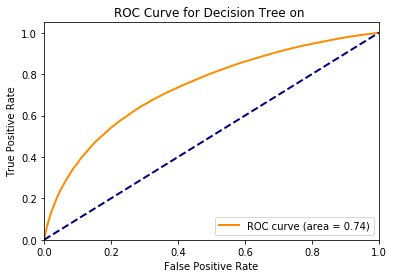

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree on ')
plt.legend(loc="lower right")
plt.show()

We can see the ROC curve is enclosed with area 0.74 and we can see the ROC curve departed from the diagonal line and it is more closed to the left upper part. The ROC curve shows that our classification is not bad. 

## Part 1 Answer:
1. The probability for a Naive Model to Guess 'THEFT' is about 0.24; the accuracy of the prediction from my model is about 0.78049, which is not bad.

2. I use ROC curve to evaluate the performance of my model. From the plot we can see the curve is closed to the left corner of the plot and the area under the ROC curve is 0.74, which indicates that my classification based on decision tree is not bad.

3. I choose random forest for my classification since it performs relatively well in classification with large data sets with amount of parameters.

4. If I have more time I will do more feature engineering on other parameters like latitude and longitude or calculating the frequency of a theft case happens in certain street or community

5. If I have more time I will do the second part